## Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## Functions

In [52]:
#     Features:(n_examples, n_features)
#     Labels: (n_examples, 1)
#     Weights:(n_features, 1)


# -- Sigmoid function -- #
def sigmoid(z):
    final_label = 1/(1+np.exp(-z))
    return final_label

# -- Predictor function -- #
def predict(features, weights):
    '''
    Returns probabilities
    of class label
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

# -- Cost function -- #
def cost_function(features, labels, weights):
    '''    
    Write down the average cross-entropy loss
    '''
    observations = len(labels)
    #print("number",observations)

    predictions = predict(features, weights)

    # You may use this format or define in your own way
    # Note: This is for binary cros-entropy loss.
    
    # We can divide the binary cross entropy loss into two parts
    # One for p(y=1) and another for p(y=0)

    # Take the error when label=1
    class1_cost = np.dot(labels, np.log(predictions))

    # Take the error when label=0
    class2_cost = np.dot(1-labels, np.log(1-predictions))
    
    # Take the sum of both costs
    cost = class1_cost + class2_cost

    # Take the average cost
    cost = -cost.sum()/observations

    return cost


def update_weights(features, labels, weights, lr):
    '''
   Gradient Descent
    '''
    N = features.shape[1]

    #1 - Get Predictions
    predictions = predict(features,weights)
    
    # Write down the gradient of the cost
    gradient = np.dot((predictions-labels), features)

    # 3 Take the average cost derivative for each feature
    gradient /= N

    # 4 Update the weights using the learning rate lr
    weights = weights - (lr*gradient)

    return weights

def decision_boundary(prob):
    return 1 if prob >= .5 else 0 # You may change the threshold from 0.5 

def train(features, labels, weights, lr, iters):
    cost_history = [np.float64('inf')]

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        
        cost_history.append(cost)

        print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

## Data

In [53]:
data = pd.read_csv("winequality-red.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [54]:
# Function to print all the missing data in the dataset
def print_missing_data(d):
    total = d.isnull().sum().sort_values(ascending = False)
    percentage = round(d.isnull().sum().sort_values(ascending = False) * 100 / len(d), 3)
    return pd.concat([total,percentage], axis = 1, keys = ['Total', 'Percentage'] )

print(print_missing_data(data))

                      Total  Percentage
fixed acidity             0         0.0
volatile acidity          0         0.0
citric acid               0         0.0
residual sugar            0         0.0
chlorides                 0         0.0
free sulfur dioxide       0         0.0
total sulfur dioxide      0         0.0
density                   0         0.0
pH                        0         0.0
sulphates                 0         0.0
alcohol                   0         0.0
quality                   0         0.0


In [55]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
data.quality.unique()

# quality column has 6 unique values

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [57]:
bins = (2,5,8)
labels = ['bad','good']
data['quality'] = pd.cut(data['quality'],bins=bins,labels=labels)

In [58]:
data.quality.unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [59]:
le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])

In [60]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [61]:
# Splitting training and test data from the given dataset
X = data[data.columns[:-1]]
y = data['quality']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle = True)

In [79]:
y_train.shape

(1279,)

In [66]:
# Initialize the weights
wts = np.zeros(X.shape[1])

# Training
optimal_wts, loss = train(X_train, y_train, wts,.000001, 1000)

iter: 0 cost: 0.6923036865951613
iter: 1 cost: 0.6915842594185714
iter: 2 cost: 0.6909639174203166
iter: 3 cost: 0.69042274072536
iter: 4 cost: 0.6899448581210245
iter: 5 cost: 0.6895176300036118
iter: 6 cost: 0.6891309925233088
iter: 7 cost: 0.6887769329135249
iter: 8 cost: 0.6884490707733023
iter: 9 cost: 0.6881423244573565
iter: 10 cost: 0.6878526455624252
iter: 11 cost: 0.6875768077489594
iter: 12 cost: 0.6873122388362161
iter: 13 cost: 0.6870568873181092
iter: 14 cost: 0.686809116237397
iter: 15 cost: 0.6865676187960723
iter: 16 cost: 0.6863313512327246
iter: 17 cost: 0.6860994794172276
iter: 18 cost: 0.6858713363448136
iter: 19 cost: 0.6856463882928678
iter: 20 cost: 0.6854242078650915
iter: 21 cost: 0.6852044525135746
iter: 22 cost: 0.6849868474194857
iter: 23 cost: 0.6847711718431865
iter: 24 cost: 0.684557248237083
iter: 25 cost: 0.6843449335593449
iter: 26 cost: 0.6841341123415414
iter: 27 cost: 0.6839246911545317
iter: 28 cost: 0.6837165941894399
iter: 29 cost: 0.68350975972

iter: 269 cost: 0.6545099795524625
iter: 270 cost: 0.6544453014422582
iter: 271 cost: 0.654380918482074
iter: 272 cost: 0.6543168292040796
iter: 273 cost: 0.6542530321482973
iter: 274 cost: 0.6541895258625575
iter: 275 cost: 0.654126308902454
iter: 276 cost: 0.6540633798313005
iter: 277 cost: 0.6540007372200853
iter: 278 cost: 0.6539383796474282
iter: 279 cost: 0.6538763056995368
iter: 280 cost: 0.6538145139701638
iter: 281 cost: 0.6537530030605632
iter: 282 cost: 0.653691771579448
iter: 283 cost: 0.6536308181429477
iter: 284 cost: 0.6535701413745659
iter: 285 cost: 0.6535097399051385
iter: 286 cost: 0.6534496123727914
iter: 287 cost: 0.6533897574229002
iter: 288 cost: 0.6533301737080476
iter: 289 cost: 0.6532708598879834
iter: 290 cost: 0.6532118146295829
iter: 291 cost: 0.6531530366068073
iter: 292 cost: 0.6530945245006627
iter: 293 cost: 0.6530362769991609
iter: 294 cost: 0.652978292797278
iter: 295 cost: 0.6529205705969164
iter: 296 cost: 0.6528631091068654
iter: 297 cost: 0.652805

iter: 536 cost: 0.6443584117584358
iter: 537 cost: 0.6443380509386131
iter: 538 cost: 0.6443177730788818
iter: 539 cost: 0.6442975778031909
iter: 540 cost: 0.6442774647373072
iter: 541 cost: 0.6442574335088049
iter: 542 cost: 0.6442374837470588
iter: 543 cost: 0.6442176150832318
iter: 544 cost: 0.6441978271502677
iter: 545 cost: 0.6441781195828811
iter: 546 cost: 0.6441584920175486
iter: 547 cost: 0.6441389440924996
iter: 548 cost: 0.6441194754477072
iter: 549 cost: 0.6441000857248789
iter: 550 cost: 0.644080774567448
iter: 551 cost: 0.6440615416205645
iter: 552 cost: 0.6440423865310864
iter: 553 cost: 0.6440233089475709
iter: 554 cost: 0.6440043085202649
iter: 555 cost: 0.6439853849010972
iter: 556 cost: 0.6439665377436697
iter: 557 cost: 0.6439477667032482
iter: 558 cost: 0.643929071436754
iter: 559 cost: 0.6439104516027562
iter: 560 cost: 0.6438919068614615
iter: 561 cost: 0.6438734368747078
iter: 562 cost: 0.6438550413059538
iter: 563 cost: 0.6438367198202728
iter: 564 cost: 0.6438

iter: 878 cost: 0.6404948378276925
iter: 879 cost: 0.6404891327526225
iter: 880 cost: 0.640483446446348
iter: 881 cost: 0.6404777788305958
iter: 882 cost: 0.6404721298274337
iter: 883 cost: 0.6404664993592699
iter: 884 cost: 0.640460887348851
iter: 885 cost: 0.6404552937192599
iter: 886 cost: 0.6404497183939154
iter: 887 cost: 0.6404441612965694
iter: 888 cost: 0.640438622351307
iter: 889 cost: 0.6404331014825426
iter: 890 cost: 0.6404275986150212
iter: 891 cost: 0.6404221136738144
iter: 892 cost: 0.6404166465843203
iter: 893 cost: 0.6404111972722618
iter: 894 cost: 0.6404057656636846
iter: 895 cost: 0.6404003516849567
iter: 896 cost: 0.6403949552627656
iter: 897 cost: 0.640389576324118
iter: 898 cost: 0.6403842147963379
iter: 899 cost: 0.6403788706070647
iter: 900 cost: 0.6403735436842527
iter: 901 cost: 0.640368233956169
iter: 902 cost: 0.640362941351392
iter: 903 cost: 0.6403576657988103
iter: 904 cost: 0.6403524072276213
iter: 905 cost: 0.6403471655673298
iter: 906 cost: 0.64034194

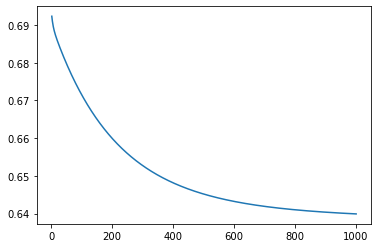

In [67]:
# Plot the loss against the number of epochs
plt.plot(np.arange(1, len(loss)+1, 1), loss)
plt.show()

In [68]:
predictions = []
for elem in predict(X, optimal_wts):
    predictions.append(decision_boundary(elem))

In [69]:
train_predictions = []
for i in predict(X_train, optimal_wts):
    train_predictions.append(decision_boundary(i))
test_predictions = []
for i in predict(X_test, optimal_wts):
    test_predictions.append(decision_boundary(i))

In [70]:
# # # Plot the decision boundary for two features. For that, we will assign a color to each
# # # point in the mesh [x_min, x_max]x[y_min, y_max].
# x_min, x_max = X.T[0].min() - 0.5, X.T[0].max() + 0.5
# y_min, y_max = X.T[1].min() - 0.5, X.T[1].max() + 0.5
# h = 0.02  # step size in the mesh
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# probs = predict(np.c_[xx.ravel(), yy.ravel()], optimal_wts[[0,1]])
# mesh_preds = []
# for elem in probs:
#     mesh_preds.append(decision_boundary(elem))
# Z = np.array(mesh_preds)
# # # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(1, figsize=(12, 5))
# plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired,shading="auto")

# # # Plot also the training points

# plt.scatter(X.T[0], X.T[1],c=y, edgecolors="k", cmap=plt.cm.Paired)
# plt.xlabel("radius_mean")
# plt.ylabel("texture_mean")
# plt.title('Gradient Descent')
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

# plt.show()

In [71]:
# Accuracy
print("Accuracy using gradient descent: {}".format(accuracy(test_predictions,y_test)))

Accuracy using gradient descent: 0.6125


## Scikit-Learn module

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
# L-BFGS
clf_lbfgs = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

# Newton-CG
clf_newt = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

C:\Users\Ujjwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
pred_lbfgs = clf_lbfgs.predict(X_test)
pred_newt = clf_newt.predict(X_test)

In [75]:
print("Accuracy using LBFGS method: {}".format(accuracy(pred_lbfgs,y_test)))
print("Accuracy using NEWTON-CG method: {}".format(accuracy(pred_newt,y_test)))

Accuracy using LBFGS method: 0.740625
Accuracy using NEWTON-CG method: 0.740625
